In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


# For Nox as target variable

# Linear Regression

In [3]:
# prepare the data for the model
# select the only NOX as target variable
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [4]:
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [5]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = nox_df.iloc[:, :-1]
y = nox_df["NOX"]


In [6]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)

In [7]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression ()
linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# evalute the model with MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = linear_model.predict(X_test)

mae1 = round(mean_absolute_error(y_test, y_pred),3)
mse1 = round(mean_squared_error(y_test, y_pred),3)

print("MAE on testset is:", round(mae1, 3))
print("MSE on testset is:", round(mse1, 3))
print(f"RMSE on the testset: {round(np.sqrt(mse1),3)}")

MAE on testset is: 5.522
MSE on testset is: 56.831
RMSE on the testset: 7.539


# Model Structure Selection to select hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [15]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-56.64361975327142


In [16]:
rg_prediction=ridge_regressor.predict(X_test)

In [17]:
mae1b = mean_absolute_error(y_test, rg_prediction)
mse1b = mean_squared_error(y_test, rg_prediction)

print("MAE on testset is:", round(mae1b, 3))
print("MSE on testset is:", round(mse1b, 3))
print(f"RMSE on the testset: {round(np.sqrt(mse1b),3)}")


MAE on testset is: 5.522
MSE on testset is: 56.831
RMSE on the testset: 7.539


In [ ]:
rg_prediction=ridge_regressor.predict(X_train)

In [ ]:
# Using Naive Base function to calculate mean absolute error
def mae(y_true, rg_prediction):
    return np.mean(abs(y_true - rg_prediction))

baseline_guess = np.median(y)
print('the baseline score is %0.2f' % baseline_guess) 
print("Baseline performance on the test set :MAE = %0.4f" % mae (y_train, baseline_guess))

# KNN

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
X = df[["AT" , "AP" , "AH" , "AFDP" , "GTEP" , "TIT" ,"TAT" , "TEY" , "CDP" ]].to_numpy()
y = df["NOX"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
# Calculating errors for the Testing Data
mae2 = round(mean_absolute_error(y_test, y_pred),3)
mse2= round(mean_squared_error(y_test, y_pred),3)
rmse2  = round (mean_squared_error(y_test, y_pred, squared=False),3)
print("Mean absolute error",mae2)
print("Mean Square error ",mse2)
print("Root Mean Square error ",rmse2)

Mean absolute error 3.46
Mean Square error  28.034
Root Mean Square error  5.295


# Use GridSearchCV to select hyper-parameters (To improve KNN performance)

In [23]:
scoring=['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5,scoring=scoring,refit='neg_mean_absolute_error',)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.15813012, 0.13409362, 0.14140224, 0.13983736, 0.1248672 ,
        0.12862086, 0.13716969, 0.14367466, 0.15806179, 0.20106187,
        0.17741857, 0.13106837, 0.1254199 , 0.21500187, 0.11422977,
        0.12682962, 0.13000045, 0.13430448, 0.12212596, 0.12576451,
        0.12431083, 0.12806768, 0.11832819, 0.09562197, 0.12538896,
        0.12955704, 0.12581491, 0.12744293, 0.12401567, 0.12734818,
        0.12421384, 0.14609666, 0.09683652, 0.11882467, 0.12743092,
        0.12300825, 0.12201338, 0.12640219, 0.12754116, 0.1262722 ,
        0.10571036, 0.11966081, 0.12575512, 0.12754626, 0.12494273,
        0.12597151, 0.12656446, 0.12532206, 0.14491377, 0.11609454,
        0.12097263, 0.12609825, 0.1271924 , 0.12432022, 0.12765145,
        0.11841116, 0.0840703 , 0.12466288, 0.12472138, 0.12442279,
        0.12373524, 0.12490735, 0.12720556, 0.1117826 , 0.1059844 ,
        0.12526174, 0.12695947, 0.12952275, 0.1347765 , 0.12431302,
        0.12900872, 0.11014767,

In [24]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.158130,0.039341,0.168903,0.077087,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",-30.247864,-30.057747,...,0.024493,29,-5.499806,-5.482495,-5.468186,-5.497770,-5.413296,-5.472311,0.031647,137
1,0.134094,0.014774,0.154328,0.013783,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",-30.247864,-30.057747,...,0.024493,29,-5.499806,-5.482495,-5.468186,-5.497770,-5.413296,-5.472311,0.031647,137
2,0.141402,0.016881,0.179560,0.092952,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",-34.191160,-32.439279,...,0.060277,74,-5.847321,-5.695549,-5.776282,-5.892490,-5.822033,-5.806735,0.067119,196
3,0.139837,0.024231,0.167758,0.088534,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",-34.191160,-32.439279,...,0.060277,74,-5.847321,-5.695549,-5.776282,-5.892490,-5.822033,-5.806735,0.067119,195
4,0.124867,0.017929,0.167780,0.015502,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",-23.819571,-24.039870,...,0.034101,10,-4.880530,-4.903047,-4.988141,-5.074704,-4.979176,-4.965119,0.068913,29


In [25]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_neg_root_mean_squared_error", "rank_test_neg_root_mean_squared_error"]].head(10)

,param_n_neighbors,param_weights,param_p,mean_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,1,uniform,1,-5.472311,137
1,1,distance,1,-5.472311,137
2,1,uniform,2,-5.806735,196
3,1,distance,2,-5.806735,195
4,2,uniform,1,-4.965119,29
5,2,distance,1,-4.899232,19
6,2,uniform,2,-5.247278,81
7,2,distance,2,-5.185486,68
8,3,uniform,1,-4.830901,11
9,3,distance,1,-4.728532,5


In [26]:
y_pred = gs.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.93490910102748

In [27]:
#fitting the best parameters we got from grid search cv to KNeighbors Regressor 
fin_model = KNeighborsRegressor(n_neighbors = 16,p=1,weights='distance')
fin_model.fit(X_train, y_train)
y_pred = fin_model.predict(X_test)

In [28]:
mae2b = mean_absolute_error(y_test, y_pred)
mse2b = mean_squared_error(y_test, y_pred)
rmse2b = mean_squared_error(y_test, y_pred, squared=False)
print("Mean absolute error",mae2b)
print("Mean Square error ",mse2b)
print("Root Mean Square error ",rmse2b)

Mean absolute error 3.2494128866365117
Mean Square error  22.988516065677736
Root Mean Square error  4.794634090905972


# Random forests 

In [21]:
# prepare the data for the model
# select the only NOX as target variable
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [22]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split

# split the data 
X = nox_df.iloc[:, :-1]
y = nox_df["NOX"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)

In [24]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
model = RandomForestRegressor(random_state =0)
model = model.fit(X_train, y_train)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

y_pred = model.predict(X_test)
mae3 = round(mean_absolute_error(y_test, y_pred),3)
mse3 = round(mean_squared_error(y_test, y_pred),3)
print("MAE on test set:", round (mae3, 3))
print("MSE on testset is:", round(mse3, 3))
print(f"RMSE on the testset: {round(np.sqrt(mse3),3)}")

MAE on test set: 2.615
MSE on testset is: 16.598
RMSE on the testset: 4.074


# Decision tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [27]:
dtree.score(X_train,y_train)

1.0

In [28]:
dtree.score(X_test,y_test)

0.730971220570753

In [29]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score
mae4 = round(mean_absolute_error(y_test, dtree_pred),3)
mse4 = round(mean_squared_error(y_test, dtree_pred),3)
rmse4 = round(mean_squared_error(y_test, dtree_pred, squared=False),3)
r2 = r2_score(y_test,dtree_pred)
print("MAE of decision tree modelis:", mae4)
print("MSE of decision tree modelis:", mse4)
print("RMSE of decision tree modelis:", rmse4)
print("R2 score of the decison tree model is:",r2)

MAE of decision tree modelis: 3.684
MSE of decision tree modelis: 35.651
RMSE of decision tree modelis: 5.971
R2 score of the decison tree model is: 0.730971220570753


#  Model Structure Selection to select hyperparameters-Randomizedsearch

In [40]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomizedSearchCV(estimator = tree.DecisionTreeRegressor(), 
                  param_distributions ={'max_depth': range(1, 21,2),
                             'min_samples_split': range(2, 20,2),
                             'min_samples_leaf':range(2,20,2),
                             "max_features": ["auto","sqrt", "log2"],
                             'criterion': ["squared_error", "absolute_error"]},
                 cv=10,
                 scoring='neg_mean_squared_error')

In [41]:
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': range(1, 21, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(2, 20, 2),
                                        'min_samples_split': range(2, 20, 2)},
                   scoring='neg_mean_squared_error')

In [ ]:
print(model.best_params_)

In [ ]:
print(model.best_estimator_)

In [ ]:
y_pred = model.predict(X_test)

mae4b = mean_absolute_error(y_test, y_pred)
mse4b = mean_squared_error(y_test, y_pred)
rmse4b = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test,dtree_pred)
print("MAE of decision tree model is:", mae4b)
print("MSE of decision tree model is:", mse4b)
print("RMSE of decision tree model is:", rmse4b)
print("R2 score of the decison tree model is:",r2)

# Non linear SVM For Nox 

In [36]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_test_pred = regressor.predict(X_test)
mae5 = round(mean_absolute_error(y_test, y_test_pred),3)
mse5 = round(mean_squared_error(y_test, y_test_pred),3)
rmse5 = round(mean_squared_error(y_test, y_test_pred, squared=False),3)
print("MAE on test set:", round (mae5, 3))
print("MSE on test set is:", round(mse5, 3))
print(f"RMSE on the test set: {round(np.sqrt(mse5),3)}")


MAE on test set: 8.359
MSE on test set is: 121.998
RMSE on the test set: 11.045


## Linear SVM For Nox

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(C=10, kernel='linear')

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_test_pred = regressor.predict(X_test)
mae6 = round(mean_absolute_error(y_test, y_test_pred),3)
mse6 = round(mean_squared_error(y_test, y_test_pred),3)
rmse6 = round(mean_squared_error(y_test, y_test_pred, squared=False),3)
print("MAE on test set:", round (mae6, 3))
print("MSE on test set is:", round(mse6, 3))
print(f"RMSE on the test set: {round(np.sqrt(mse6),3)}")


MAE on test set: 6.141
MSE on test set is: 65.418
RMSE on the test set: 8.088


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


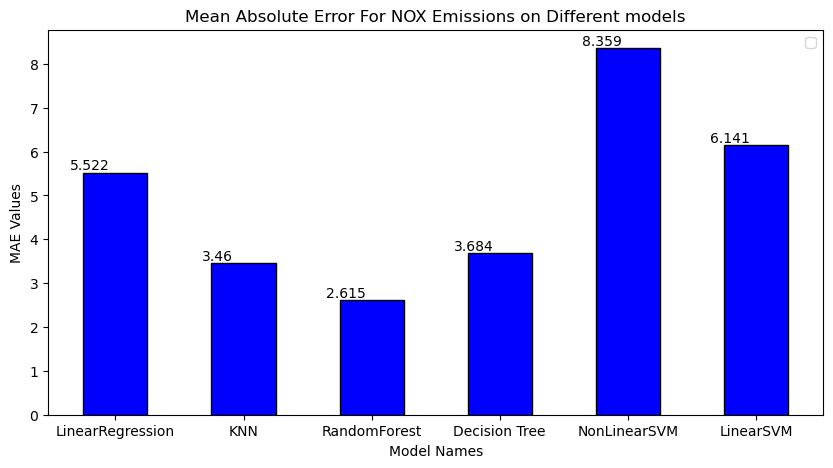

In [38]:
import matplotlib.pyplot as plt

# data
models = ["LinearRegression","KNN","RandomForest","Decision Tree", "NonLinearSVM", "LinearSVM"]
mae_values = [mae1,mae2,mae3,mae4,mae5,mae6]

# Set the width of the bars
bar_width = 0.5
gap = 0.2

# Create a figure and axis object with custom size
fig, ax = plt.subplots(figsize=(10, 5))

# Position the bars on the x-axis
r = range(len(models))

# Create the bar chart
plt.bar([i + gap for i in r], mae_values, color="blue", width=bar_width, edgecolor="black")

# Add labels and title
plt.xlabel("Model Names")
plt.ylabel("MAE Values")
plt.title("Mean Absolute Error For NOX Emissions on Different models")

# Add values to each bar
for i, v in enumerate(mae_values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Set the x-axis tick locations and labels
plt.xticks([i + gap for i in r], models)

# Add legend
plt.legend()

# Show the chart
plt.show()


# FOR CO
# Linear Regression

In [68]:
# prepare the data for the model
# select the only CO as target variabel
co_df = df.copy()
co_df = co_df.drop("NOX", axis = 1) # drop the target variable CO

In [69]:
co_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [70]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = co_df.iloc[:, :-1]
y = co_df["CO"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3,random_state= 42, shuffle = True)

In [72]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression ()
linear_model.fit(X_train, y_train)

LinearRegression()

In [74]:
# evalute the model with MAE
from sklearn.metrics import mean_absolute_error
y_pred = linear_model.predict(X_test)
mae_a = round(mean_absolute_error(y_test, y_pred),3)
mse_a = round(mean_squared_error(y_test, y_pred),3)
print("MAE on testset is:", round(mae_a, 3))
print("MSE on testset is:", round(mse_a, 3))
print(f"RMSE on the testset: {round(np.sqrt(mse_a),3)}")

MAE on testset is: 0.831
MSE on testset is: 2.09
RMSE on the testset: 1.446


# KNN

In [75]:
X = co_df[["AT" , "AP" , "AH" , "AFDP" , "GTEP" , "TIT" ,"TAT" , "TEY" , "CDP" ]].to_numpy()
y = co_df["CO"].to_numpy()

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [77]:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
# Calculating errors for the Testing Data
mae_b = round(mean_absolute_error(y_test, y_pred),3)
mse_b = round(mean_squared_error(y_test, y_pred),3)
rmse_b = round(mean_squared_error(y_test, y_pred, squared=False),3)
print("Mean absolute error",mae_b)
print("Mean Square error ",mse_b)
print("Root Mean Square error ",rmse_b)

Mean absolute error 0.523
Mean Square error  1.536
Root Mean Square error  1.239


   # Random forests

In [79]:
# prepare the data for the model
# select the only NOX as target variable
co_df = df.copy()
co_df = co_df.drop("NOX", axis = 1) # drop the target variable NOX

In [80]:
co_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [81]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = co_df.iloc[:, :-1]
y = co_df["CO"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)

In [83]:
model1 = RandomForestRegressor(random_state =0)
model1 = model1.fit(X_train, y_train)

In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

y_pred = model1.predict(X_test)
mae_c = round(mean_absolute_error(y_test, y_pred),3)
mse_c = round(mean_squared_error(y_test, y_pred),3)
print("MAE on test set:", round (mae_c, 3))
print("MSE on testset is:", round(mse_c, 3))
print(f"RMSE on the testset: {round(np.sqrt(mse_c),3)}")

MAE on test set: 0.491
MSE on testset is: 1.271
RMSE on the testset: 1.127


# Decision tree

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [86]:
dtree.score(X_train,y_train)

1.0

In [87]:
dtree.score(X_test,y_test)

0.5184323006593168

In [88]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score
mae_d = round(mean_absolute_error(y_test, dtree_pred),3)
mse_d = round(mean_squared_error(y_test, dtree_pred),3)
rmse_d = round(mean_squared_error(y_test, dtree_pred, squared=False),3)
r2 = r2_score(y_test,dtree_pred)
print("MAE of decision tree model is:", mae_d)
print("MSE of decision tree model is:", mse_d)
print("RMSE of decision tree model is:", rmse_d)
print("R2 score of the decison tree model is:",r2)

MAE of decision tree model is: 0.673
MSE of decision tree model is: 2.619
RMSE of decision tree model is: 1.618
R2 score of the decison tree model is: 0.5184323006593168


## Non Linear SVM For CO

In [89]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [90]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_test_pred = regressor.predict(X_test)
mae_e = round(mean_absolute_error(y_test, y_test_pred),3)
mse_e = round(mean_squared_error(y_test, y_test_pred),3)
rmse_e =round(mean_squared_error(y_test, y_test_pred, squared=False),3)
print("MAE on test set:", round (mae_e, 3))
print("MSE on test set is:", round(mse_e, 3))
print(f"RMSE on the test set: {round(np.sqrt(mse_e),3)}")


MAE on test set: 0.845
MSE on test set is: 3.079
RMSE on the test set: 1.755


## Linear SVM For CO

In [91]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_test_pred = regressor.predict(X_test)
mae_f = round(mean_absolute_error(y_test, y_test_pred),3)
mse_f= round(mean_squared_error(y_test, y_test_pred),3)
rmse_f = round(mean_squared_error(y_test, y_test_pred, squared=False),3)
print("MAE on test set:", round (mae_f, 3))
print("MSE on test set is:", round(mse_f, 3))
print(f"RMSE on the test set: {round(np.sqrt(mse_f),3)}")


MAE on test set: 0.924
MSE on test set is: 2.624
RMSE on the test set: 1.62


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


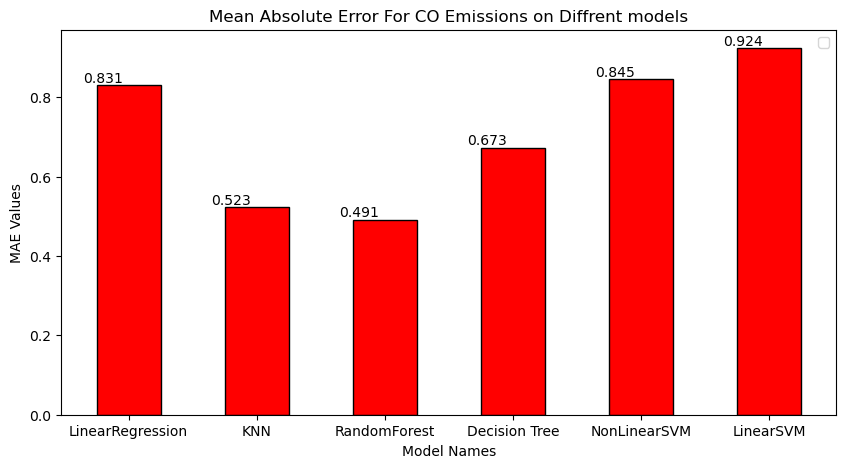

In [93]:
import matplotlib.pyplot as plt

# data
models = ["LinearRegression","KNN","RandomForest","Decision Tree", "NonLinearSVM", "LinearSVM"]
mae_values = [mae_a,mae_b,mae_c,mae_d,mae_e,mae_f]

# Set the width of the bars
bar_width = 0.5
gap = 0.2

# Create a figure and axis object with custom size
fig, ax = plt.subplots(figsize=(10, 5))

# Position the bars on the x-axis
r = range(len(models))

# Create the bar chart
plt.bar([i + gap for i in r], mae_values, color="green", width=bar_width, edgecolor="black")

# Add labels and title
plt.xlabel("Model Names")
plt.ylabel("MAE Values")
plt.title("Mean Absolute Error For CO Emissions on Different models")

# Add values to each bar
for i, v in enumerate(mae_values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Set the x-axis tick locations and labels
plt.xticks([i + gap for i in r], models)

# Add legend
plt.legend()

# Show the chart
plt.show()
